In [59]:
def ista_solve_hot( A, d, la_array ):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

<h2> Item 1 a) <h2>
<h3> code to find the optimal weights using only the first 100 patients <h3>

In [60]:
#Q1.a

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

#25 lambda values, from 10^-6 to 10
lambda_range = np.logspace(-6, 1.3, 25)


data = loadmat("BreastCancer.mat")
X = data["X"][:100, :]
y = data["y"][:100, :]


# sols for each lambda using func above
solutions = ista_solve_hot(X, y, lambda_range)

#L1 norms and residuals
l1_norms = np.sum(np.abs(solutions), axis=0)
residuals = np.linalg.norm(X @ solutions - y, axis=0, ord=2)



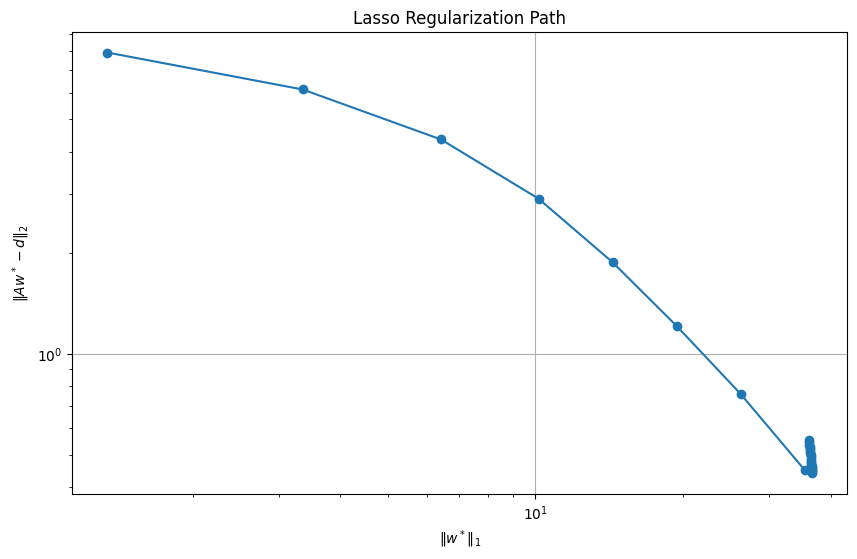

In [61]:
#plotting
plt.figure(figsize=(10, 6))
plt.plot(l1_norms, residuals, marker='o')
plt.xlabel(r'$\|w^*\|_1$')
plt.ylabel(r'$\|Aw^* - d\|_2$')
plt.title('Lasso Regularization Path')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [62]:
# Print lambda values alongside residuals
for lambda_val, residual in zip(lambda_range, residuals):
    print(f"Lambda: {lambda_val}, Residual: {residual}")

Lambda: 1e-06, Residual: 0.5517470751599153
Lambda: 2.0144971934067793e-06, Residual: 0.5436396687495502
Lambda: 4.058198942243799e-06, Residual: 0.535666875525937
Lambda: 8.175230379436494e-06, Residual: 0.5278260582082662
Lambda: 1.6468978654828687e-05, Residual: 0.5201147305558144
Lambda: 3.3176711278428546e-05, Residual: 0.512530630343465
Lambda: 6.683439175686136e-05, Residual: 0.5050718781994392
Lambda: 0.00013463769461724665, Residual: 0.4977372898596276
Lambda: 0.0002712272579332027, Residual: 0.49052704150392773
Lambda: 0.000546386549881854, Residual: 0.4834439033364466
Lambda: 0.0011006941712522092, Residual: 0.4764958351251468
Lambda: 0.0022173453187867786, Residual: 0.4697012138978893
Lambda: 0.004466835921509625, Residual: 0.46309941780737063
Lambda: 0.008998428427289734, Residual: 0.45677285203957796
Lambda: 0.018127308811846966, Residual: 0.4508931280137289
Lambda: 0.03651741272548377, Residual: 0.44582015883624454
Lambda: 0.07356422544596407, Residual: 0.442325979421671

<h2> Item 1 b) <h2>

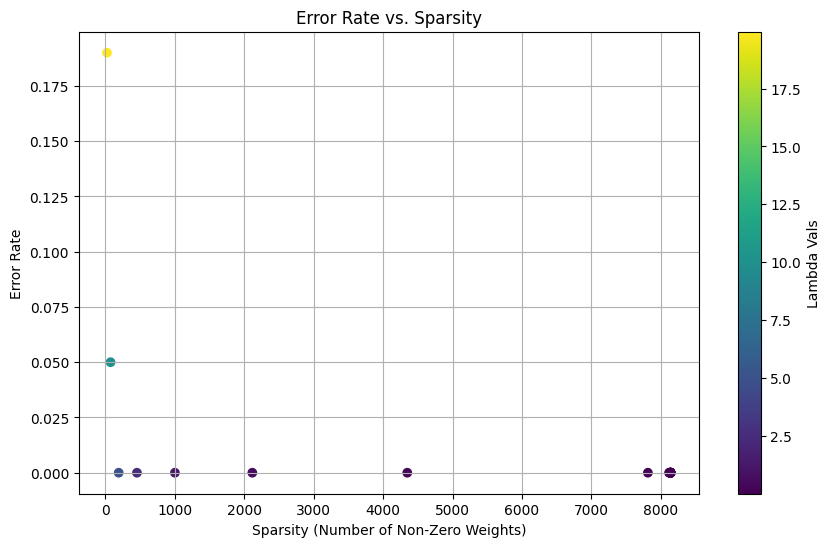

In [63]:
#Q1.b

#find sparsity and error rate for each lambda
sparsities = np.sum(np.abs(solutions) > 1e-6, axis=0)  # of weights that are > 0
error_rates = [] #error rates for each lambda

for i in range(solutions.shape[1]):
    #predictions
    w_star = solutions[:, i:i+1]
    predictions = (np.sign(X @ w_star))

    #errors
    incorrect = np.sum(predictions != y)
    error_rate = incorrect / len(y)
    
    error_rates.append(error_rate)

#plotting
plt.figure(figsize=(10, 6))
plt.scatter(sparsities, error_rates, c=lambda_range)
plt.xlabel('Sparsity (Number of Non-Zero Weights)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Sparsity')
plt.colorbar(label='Lambda Vals')
plt.grid(True)
plt.show()

In [64]:
for lambda_val, sparsity, error_rate in zip(lambda_range, sparsities, error_rates):
    print(f"Lambda: {lambda_val}, Sparsity: {sparsity}, Error Rate: {error_rate}")

Lambda: 1e-06, Sparsity: 8137, Error Rate: 0.0
Lambda: 2.0144971934067793e-06, Sparsity: 8140, Error Rate: 0.0
Lambda: 4.058198942243799e-06, Sparsity: 8140, Error Rate: 0.0
Lambda: 8.175230379436494e-06, Sparsity: 8139, Error Rate: 0.0
Lambda: 1.6468978654828687e-05, Sparsity: 8139, Error Rate: 0.0
Lambda: 3.3176711278428546e-05, Sparsity: 8140, Error Rate: 0.0
Lambda: 6.683439175686136e-05, Sparsity: 8141, Error Rate: 0.0
Lambda: 0.00013463769461724665, Sparsity: 8139, Error Rate: 0.0
Lambda: 0.0002712272579332027, Sparsity: 8139, Error Rate: 0.0
Lambda: 0.000546386549881854, Sparsity: 8138, Error Rate: 0.0
Lambda: 0.0011006941712522092, Sparsity: 8139, Error Rate: 0.0
Lambda: 0.0022173453187867786, Sparsity: 8140, Error Rate: 0.0
Lambda: 0.004466835921509625, Sparsity: 8140, Error Rate: 0.0
Lambda: 0.008998428427289734, Sparsity: 8140, Error Rate: 0.0
Lambda: 0.018127308811846966, Sparsity: 8139, Error Rate: 0.0
Lambda: 0.03651741272548377, Sparsity: 8131, Error Rate: 0.0
Lambda: 0.

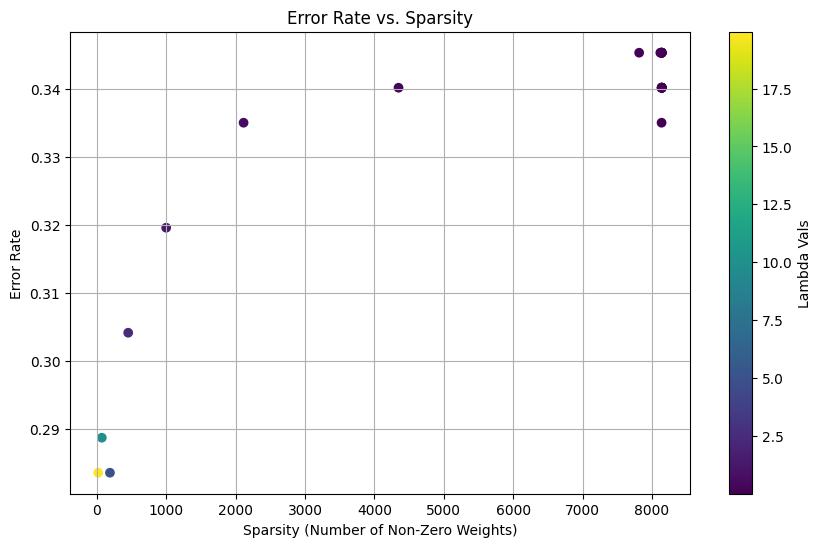

In [65]:
#Q1.c

X = data["X"][101:295, :]
y = data["y"][101:295, :]

#find residuals and sparsity and error rate for each lambda using test data
test_residuals = np.linalg.norm(X @ solutions - y, axis=0, ord=2)
test_sparsities = np.sum(np.abs(solutions) > 1e-6, axis=0)

error_rates = [] #error rates for each lambda

for i in range(solutions.shape[1]):
    #predictions using the previous weights
    w_star = solutions[:, i:i+1]
    predictions = (np.sign(X @ w_star))

    #errors
    incorrect = np.sum(predictions != y)
    error_rate = incorrect / len(y)
    error_rates.append(error_rate)

#plotting
plt.figure(figsize=(10, 6))
plt.scatter(sparsities, error_rates, c=lambda_range)
plt.xlabel('Sparsity (Number of Non-Zero Weights)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Sparsity')
plt.colorbar(label='Lambda Vals')
plt.grid(True)
plt.show()

In [66]:
for lambda_val, sparsity, error_rate in zip(lambda_range, sparsities, error_rates):
    print(f"Lambda: {lambda_val}, Sparsity: {sparsity}, Error Rate: {error_rate}")

Lambda: 1e-06, Sparsity: 8137, Error Rate: 0.33505154639175255
Lambda: 2.0144971934067793e-06, Sparsity: 8140, Error Rate: 0.3402061855670103
Lambda: 4.058198942243799e-06, Sparsity: 8140, Error Rate: 0.3402061855670103
Lambda: 8.175230379436494e-06, Sparsity: 8139, Error Rate: 0.3402061855670103
Lambda: 1.6468978654828687e-05, Sparsity: 8139, Error Rate: 0.3402061855670103
Lambda: 3.3176711278428546e-05, Sparsity: 8140, Error Rate: 0.3402061855670103
Lambda: 6.683439175686136e-05, Sparsity: 8141, Error Rate: 0.3402061855670103
Lambda: 0.00013463769461724665, Sparsity: 8139, Error Rate: 0.3402061855670103
Lambda: 0.0002712272579332027, Sparsity: 8139, Error Rate: 0.3402061855670103
Lambda: 0.000546386549881854, Sparsity: 8138, Error Rate: 0.34536082474226804
Lambda: 0.0011006941712522092, Sparsity: 8139, Error Rate: 0.34536082474226804
Lambda: 0.0022173453187867786, Sparsity: 8140, Error Rate: 0.34536082474226804
Lambda: 0.004466835921509625, Sparsity: 8140, Error Rate: 0.3453608247422

<h2> Question 2 <h2>

In [67]:
#Q2

## Breast Cancer LASSO Exploration
## Prepare workspace
from scipy.io import loadmat
import numpy as np
X = loadmat("BreastCancer.mat")['X']
y = loadmat("BreastCancer.mat")['y']

def ista_solve_hot( A, d, la_array ):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

def ridge_regression(A, d, lambda_val):
    n = A.shape[0]
    I = np.eye(n)

    w_hat = A.T @ np.linalg.inv(A @ A.T + lambda_val * I) @ d

    return w_hat

def calculate_errors(X, y, w_hat):
    predictions = np.sign(X @ w_hat)
    mse = np.mean((y - predictions) ** 2)
    se = np.sum((y - predictions) ** 2)
    miss = np.sum((y != predictions))
    error_rate = np.mean(np.sign(predictions) != np.sign(y))
    return mse, error_rate, se, miss

##  10-fold CV

# each row of setindices denotes the starting an ending index for one
# partition of the data: 5 sets of 30 samples and 5 sets of 29 samples
setindices = [[1,30],[31,60],[61,90],[91,120],[121,150],[151,179],[180,208],[209,237],[238,266],[267,295]]

# each row of holdoutindices denotes the partitions that are held out from
# the training set
holdoutindices = [[1,2],[2,3],[3,4],[4,5],[5,6],[7,8],[9,10],[10,1]]

cases = len(holdoutindices)
lambda_values = np.logspace(-6, 1, 25)
all_errors = []
overall_ridge_error = np.zeros(4)
overall_lasso_error = np.zeros(4)

# Loop over various cases
for j in range(cases):
    # row indices of first validation set
    v1_ind = np.arange(setindices[holdoutindices[j][0]-1][0]-1,setindices[holdoutindices[j][0]-1][1])

    # row indices of second validation set
    v2_ind = np.arange(setindices[holdoutindices[j][1]-1][0]-1,setindices[holdoutindices[j][1]-1][1])

    # row indices of training set
    trn_ind = list(set(range(295))-set(v1_ind)-set(v2_ind))

    # define matrix of features and labels corresponding to first
    # validation set
    Av1 = X[v1_ind,:]
    bv1 = y[v1_ind]

    # define matrix of features and labels corresponding to second
    # validation set
    Av2 = X[v2_ind,:]
    bv2 = y[v2_ind]

    # define matrix of features and labels corresponding to the
    # training set
    At = X[trn_ind,:]
    bt = y[trn_ind]

    #print(len(v1_ind), len(v2_ind), len(trn_ind))
# Use training data to learn classifier
#   W = ista_solve_hot(At,bt,lam_vals),
#
# Find best lambda value using first validation set, then evaluate
# performance on second validation set, and accumulate performance metrics
# over all cases partitions

    W_lasso = ista_solve_hot(At, bt, lambda_values)
    W_ridge = [ridge_regression(At, bt, lam) for lam in lambda_values]

    print(j + 1)

    ##performance on first validation set and find best lambda
    ridge_errors = [calculate_errors(Av1, bv1, w) for w in W_ridge]
    lasso_errors = [calculate_errors(Av1, bv1, w[:, np.newaxis]) for w in W_lasso.T]

    ##use best lambda_val
    best_lambda_ridge = lambda_values[np.argmin([error[0] for error in ridge_errors])]
    best_lambda_lasso = lambda_values[np.argmin([error[0] for error in lasso_errors])]

    ##performance on second validation set using the best lambda
    best_ridge = W_ridge[np.argmin([error[0] for error in ridge_errors])]
    best_lasso = W_lasso[:, np.argmin([error[0] for error in lasso_errors])][:, np.newaxis]

    final_ridge_error = calculate_errors(Av2, bv2, best_ridge)
    final_lasso_error = calculate_errors(Av2, bv2, best_lasso)

    print("Case {}: Ridge - MSE: {}, Error Rate: {}, Squared Error: {}, Missclassifications: {}".format(j, final_ridge_error[0], final_ridge_error[1], final_ridge_error[2], final_ridge_error[3]))
    print("Case {}: LASSO - MSE: {}, Error Rate: {}, Squared Error: {}, Missclassifications: {}".format(j, final_lasso_error[0], final_lasso_error[1], final_lasso_error[2], final_lasso_error[3]))

    overall_ridge_error[0] += final_ridge_error[0]
    overall_ridge_error[1] += final_ridge_error[1]
    overall_ridge_error[2] += final_ridge_error[2]
    overall_ridge_error[3] += final_ridge_error[3]

    overall_lasso_error[0] += final_lasso_error[0]
    overall_lasso_error[1] += final_lasso_error[1]
    overall_lasso_error[2] += final_lasso_error[2]
    overall_lasso_error[3] += final_lasso_error[3]

print()
print("Ridge Ending Averages: Ridge - MSE: {}, Error Rate: {}, Squared Error: {}, Missclassifications: {}".format(overall_ridge_error[0] / 8, overall_ridge_error[1] / 8, overall_ridge_error[2] / 8, overall_ridge_error[3]))
print("Lasso Ending Averages: LASSO - MSE: {}, Error Rate: {}, Squared Error: {}, Missclassifications: {}".format(overall_lasso_error[0] / 8, overall_lasso_error[1] / 8, overall_lasso_error[2] / 8, overall_lasso_error[3]))



1
Case 0: Ridge - MSE: 1.7333333333333334, Error Rate: 0.43333333333333335, Squared Error: 52.0, Missclassifications: 13
Case 0: LASSO - MSE: 1.6, Error Rate: 0.4, Squared Error: 48.0, Missclassifications: 12
2
Case 1: Ridge - MSE: 0.9333333333333333, Error Rate: 0.23333333333333334, Squared Error: 28.0, Missclassifications: 7
Case 1: LASSO - MSE: 1.0666666666666667, Error Rate: 0.26666666666666666, Squared Error: 32.0, Missclassifications: 8
3
Case 2: Ridge - MSE: 1.7333333333333334, Error Rate: 0.43333333333333335, Squared Error: 52.0, Missclassifications: 13
Case 2: LASSO - MSE: 2.0, Error Rate: 0.5, Squared Error: 60.0, Missclassifications: 15
4
Case 3: Ridge - MSE: 0.8, Error Rate: 0.2, Squared Error: 24.0, Missclassifications: 6
Case 3: LASSO - MSE: 0.6666666666666666, Error Rate: 0.16666666666666666, Squared Error: 20.0, Missclassifications: 5
5
Case 4: Ridge - MSE: 1.2413793103448276, Error Rate: 0.3103448275862069, Squared Error: 36.0, Missclassifications: 9
Case 4: LASSO - MS